Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


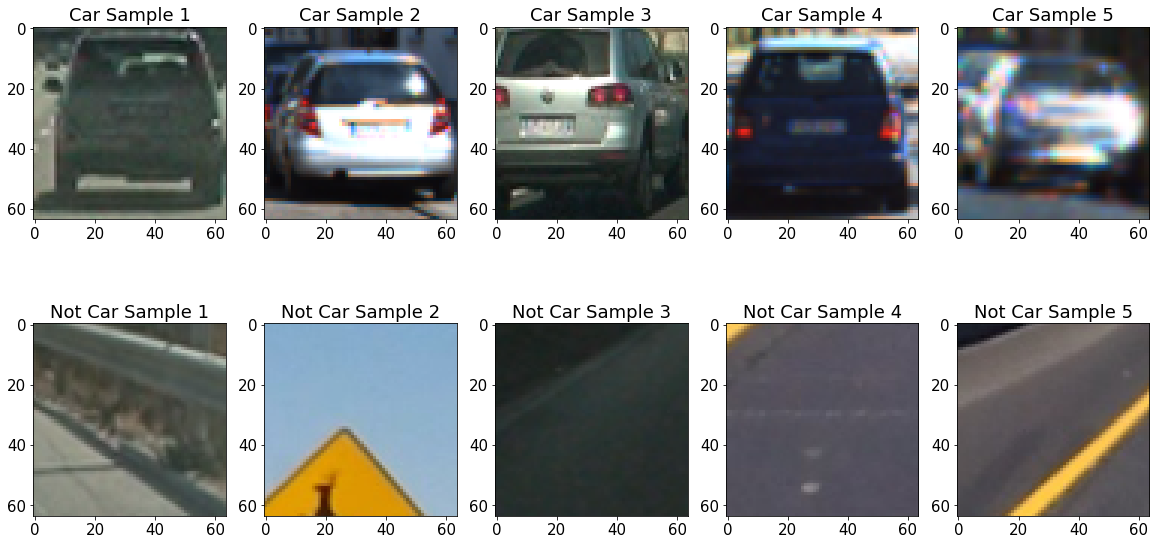

In [1]:
# Code from Udacity Self Driving Car Nano Degree
# From Lesson: 21 Video  : 19
# commented out lines are original lines that were modifed

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import os
#from skimage.feature import hog
#from skimage import color, exposure
%matplotlib inline
# images are divided up into vehicles and non-vehicles
vehicles_directory = 'vehicles/'
subdirectories = os.listdir(vehicles_directory)# this is similar to Q+A video
#print('subdirectories', subdirectories)# this was to check when slash needed to be added
#images = glob.glob('*.jpeg')
#images = glob.glob(vehicles_directory+subdirectory+'*.png')

cars = []

for subdirectory in subdirectories:
    #print(vehicles_directory+subdirectory+'/*.png')
    images = glob.glob(vehicles_directory+subdirectory+'/'+'*.png') # this line needs a slash unlike Q+A video
    
    cars.extend(images)

#############same for non cars
non_vehicles_directory = 'non-vehicles/'
subdirectories = os.listdir(non_vehicles_directory)# this is similar to Q+A video

notcars = []

for subdirectory in subdirectories:
    #print(vehicles_directory+subdirectory+'/*.png')
    images = glob.glob(non_vehicles_directory+subdirectory+'/'+'*.png') # this line needs a slash unlike Q+A video
    
    notcars.extend(images)
    

#####################plot

#original version below
#for image in images:
#    if 'image' in image or 'extra' in image:
#        notcars.append(image)
#    else:
#        cars.append(image)
        
# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict
    
data_info = data_look(cars, notcars)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])
# Just for fun choose random car / not-car indices and plot example images   
#car_ind = np.random.randint(0, len(cars))
#notcar_ind = np.random.randint(0, len(notcars))
 
car_sample = []
not_car_sample = []

for i in range( 0,5) :
    car_ind = np.random.randint(0, len(cars))
    notcar_ind = np.random.randint(0, len(notcars))
# Read in car / not-car images
    car_sample.append(mpimg.imread(cars[car_ind]))
    not_car_sample.append(mpimg.imread(notcars[notcar_ind]))
#print('car_sample length:', len(car_sample))

# below is using the subplot 3 digit plot method as an experiment.....prefer using axis......

fig = plt.figure(figsize=(20,10))
plt.rc('font', size=15)  
plt.subplot(251)
plt.imshow(car_sample[0])
plt.title('Car Sample 1')

plt.subplot(252)
plt.imshow(car_sample[1])
plt.title('Car Sample 2')

plt.subplot(253)
plt.imshow(car_sample[2])
plt.title('Car Sample 3')

plt.subplot(254)
plt.imshow(car_sample[3])
plt.title('Car Sample 4')

plt.subplot(255)
plt.imshow(car_sample[4])
plt.title('Car Sample 5')

plt.subplot(256)
plt.imshow(not_car_sample[0])
plt.title('Not Car Sample 1')

plt.subplot(257)
plt.imshow(not_car_sample[1])
plt.title('Not Car Sample 2')

plt.subplot(258)
plt.imshow(not_car_sample[2])
plt.title('Not Car Sample 3')

plt.subplot(259)
plt.imshow(not_car_sample[3])
plt.title('Not Car Sample 4')

plt.subplot(2,5,10)
plt.imshow(not_car_sample[4])
plt.title('Not Car Sample 5')

plt.show()
  
# Plot the examples
#fig = plt.figure()
#plt.subplot(121)
#plt.imshow(car_image)
#plt.title('Example Car Image')
#plt.subplot(122)
#plt.imshow(notcar_image)
#plt.title('Example Not-car Image')


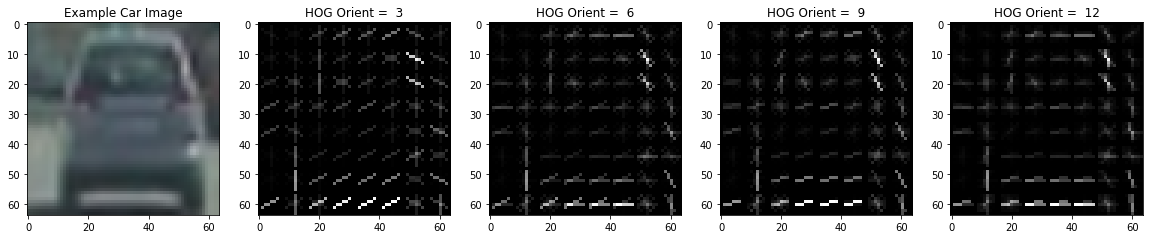

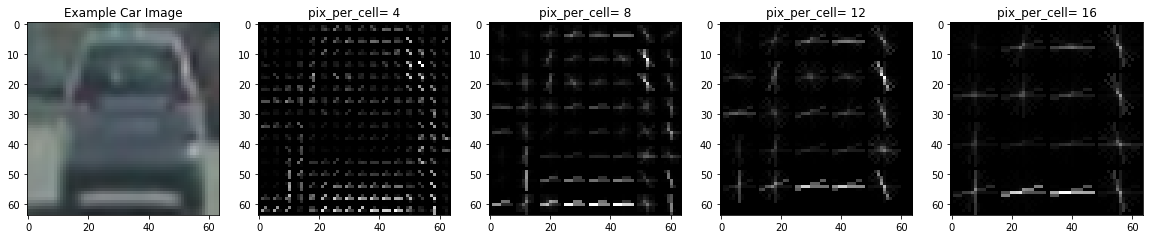

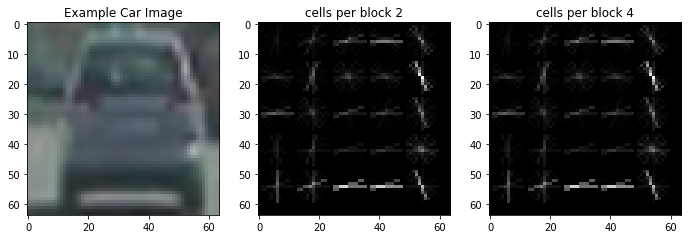

In [2]:
############
# from udacity lesson 21 section 20

import matplotlib.image as mpimg
import numpy as np
import cv2
from skimage.feature import hog
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  block_norm= 'L2-Hys',
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       block_norm= 'L2-Hys',
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features
    
    
# Generate a random index to look at a car image
#ind = np.random.randint(0, len(car_images))
#ind = np.random.randint(0, len(cars))
ind = 5 # just to get consistent pcitures
# Read in the image
#image = mpimg.imread(car_images[ind])
image = mpimg.imread(cars[ind])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Call our function with vis=True to see an image output
features, hog_image1 = get_hog_features(gray, orient= 3, 
                        pix_per_cell= 8, cell_per_block= 2, 
                        vis=True, feature_vec=False)

features, hog_image2 = get_hog_features(gray, orient= 6, 
                        pix_per_cell= 8, cell_per_block= 2, 
                        vis=True, feature_vec=False)

features, hog_image3 = get_hog_features(gray, orient= 9, 
                        pix_per_cell= 8, cell_per_block= 2, 
                        vis=True, feature_vec=False)

features, hog_image4 = get_hog_features(gray, orient= 12, 
                        pix_per_cell= 8, cell_per_block= 2, 
                        vis=True, feature_vec=False)
##################################################################

features, hog_image5 = get_hog_features(gray, orient= 12, 
                        pix_per_cell= 4, cell_per_block= 2, 
                        vis=True, feature_vec=False)

features, hog_image6 = get_hog_features(gray, orient= 12, 
                        pix_per_cell= 8, cell_per_block= 2, 
                        vis=True, feature_vec=False)

features, hog_image7 = get_hog_features(gray, orient= 12, 
                        pix_per_cell= 12, cell_per_block= 2, 
                        vis=True, feature_vec=False)

features, hog_image8 = get_hog_features(gray, orient= 12, 
                        pix_per_cell= 16, cell_per_block= 2, 
                        vis=True, feature_vec=False)

##################################################################

features, hog_image9 = get_hog_features(gray, orient= 12, 
                        pix_per_cell= 12, cell_per_block= 2, 
                        vis=True, feature_vec=False)

features, hog_image10 = get_hog_features(gray, orient= 12, 
                        pix_per_cell= 12, cell_per_block= 4, 
                        vis=True, feature_vec=False)
'''
features, hog_image11 = get_hog_features(gray, orient= 12, 
                        pix_per_cell= 12, cell_per_block= 8, 
                        vis=True, feature_vec=False)

features, hog_image12 = get_hog_features(gray, orient= 12, 
                        pix_per_cell= 12, cell_per_block= 12, 
                        vis=True, feature_vec=False)
'''

# Plot the examples

fig2 = plt.figure(figsize=(20,10))
plt.subplot(151)
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
                                        
plt.subplot(152)
plt.imshow(hog_image1, cmap='gray')
plt.title('HOG Orient =  3')

plt.subplot(153)
plt.imshow(hog_image2, cmap='gray')
plt.title('HOG Orient =  6')

plt.subplot(154)
plt.imshow(hog_image3, cmap='gray')
plt.title('HOG Orient =  9')

plt.subplot(155)
plt.imshow(hog_image4, cmap='gray')
plt.title('HOG Orient =  12')

# Plot the examples

fig3 = plt.figure(figsize=(20,10))
plt.subplot(151)
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
                                        
plt.subplot(152)
plt.imshow(hog_image5, cmap='gray')
plt.title('pix_per_cell= 4')

plt.subplot(153)
plt.imshow(hog_image6, cmap='gray')
plt.title('pix_per_cell= 8')

plt.subplot(154)
plt.imshow(hog_image7, cmap='gray')
plt.title('pix_per_cell= 12')

plt.subplot(155)
plt.imshow(hog_image8, cmap='gray')
plt.title('pix_per_cell= 16')

# Plot the examples

fig2 = plt.figure(figsize=(20,10))
plt.subplot(151)
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
                                        
plt.subplot(152)
plt.imshow(hog_image9, cmap='gray')
plt.title('cells per block 2')

plt.subplot(153)
plt.imshow(hog_image10, cmap='gray')
plt.title('cells per block 4')

In [3]:
#########################
# this is from Lesson 21 section 22

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
#import glob

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features  
def color_hist(img, nbins=32): #bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins)#, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins)#, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins)#, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features
'''    
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256)):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of 
    #print('file in imgs', imgs[1])
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        #print('after imread')
    
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        else: feature_image = np.copy(image)      
        # Apply bin_spatial() to get spatial color features
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        # Apply color_hist() also with a color space option now
        hist_features = color_hist(feature_image, nbins=hist_bins)#, bins_range=hist_range)
        # Append the new feature vector to the features list
        features.append(np.concatenate((spatial_features, hist_features)))
    # Return list of feature vectors
    return features
'''

# images already loaded
#images = glob.glob('*.jpeg')
#cars = []
#notcars = []
#for image in images:
#    if 'image' in image or 'extra' in image:
#        notcars.append(image)
#    else:
#        cars.append(image)
        
#car_features = extract_features(cars, cspace='RGB', spatial_size=(32, 32),
#                        hist_bins=32, hist_range=(0, 256))
#notcar_features = extract_features(notcars, cspace='RGB', spatial_size=(32, 32),
#                        hist_bins=32, hist_range=(0, 256))

print('cars len', len(cars))
car_features = extract_features(cars, color_space='RGB', spatial_size=(64, 64),
                        hist_bins=32)#, hist_range=(0, 256))
notcar_features = extract_features(notcars, color_space='RGB', spatial_size=(64, 64),
                        hist_bins=32)#, hist_range=(0, 256))


if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    #car_ind = np.random.randint(0, len(cars))
    car_ind = 5#changed from random to experiment
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
      print('Your function only returns empty feature vectors...')

cars len 8792


KeyboardInterrupt: 

In [9]:
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

In [10]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
#from lesson_functions import *
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
from sklearn.model_selection import train_test_split

#################
# from udacity lesson 21 section 34
# this is same as cell above but different options for testing

# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)


def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows  

sample_size = 8700#500
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]

### TODO: Tweak these parameters and see how the results change.
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 12##12#9#12#9#12  # HOG orientations 9  and 8 below did best
pix_per_cell =12# 8#12#8#12#8#12 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' #0 # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400,656]#[None, None] # Min and max in y to search in slide_window()

print('cars len', len(cars) , 'notcars len', len(notcars) )
car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)

print('X len', len(X), 'Y Len', len(y))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rand_state)




# Fit a per-column scaler
X_scaler = StandardScaler().fit(X_train)
# Apply the scaler to X
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

#image = mpimg.imread('bbox-example-image.jpg')
image = mpimg.imread('test1.jpg')
draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
image = image.astype(np.float32)/255 # changed 14.48

#windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
#                    xy_window=(96, 96), xy_overlap=(0.5, 0.5))

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(64,64), xy_overlap=(0.5, 0.5))


hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

plt.imshow(window_img)

# Using: 12 orientations 12 pixels per cell and 2 cells per block best result test image one 2 cars no false positives ...slow

cars len 8700 notcars len 8700


TypeError: extract_features() got an unexpected keyword argument 'orient'

In [ ]:
#####
# from lesson 21 section 35
# lesson_functions.py

import numpy as np
import cv2
from skimage.feature import hog

def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  block_norm= 'L2-Hys',
                                  transform_sqrt=False, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block),
                       block_norm= 'L2-Hys',
                       transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        return features

def bin_spatial(img, size=(32, 32)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))
                        
def color_hist(img, nbins=32):    #bins_range=(0, 256)
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features


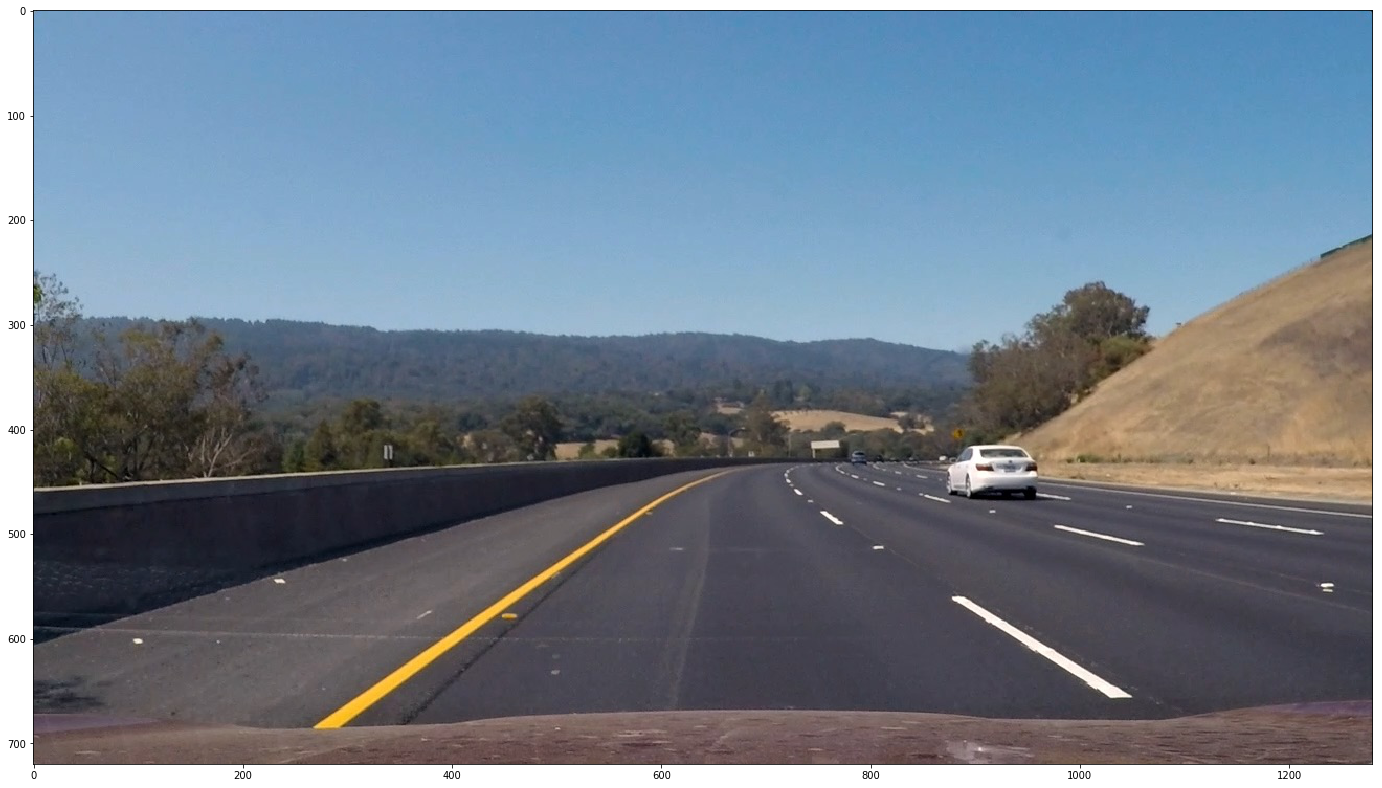

In [11]:

def find_cars4(img,scale,y_start,y_stop):

   # img = mpimg.imread(img)
    draw_img = np.copy(img)
   
    #make heat map of zeros
    heatmap = np.zeros_like(img[ :, :, 0])
    ######################
    # I put in some deffinitions here that were decalred in other places in other versions just to keep it relativly simple...
    #y_start, y_stop = 400,656 # this is values from else where defined here rather than usin g Global variables
    #scale = 1.5
    #pix_per_cell = 8
    #cell_per_block = 2
    #orient = 9
    #print('orient', orient,'cell_per_block', cell_per_block, 'pix_per_cell', pix_per_cell)
     
    
    img = img.astype(np.float32) / 255
    bbox_list = []
    
    img_search = img[y_start:y_stop,:,:]
    ctrans_search = cv2.cvtColor(img_search, cv2.COLOR_RGB2YCrCb)
    if scale != 1:
        imshape = ctrans_search.shape 
        ctrans_search = cv2.resize(ctrans_search, (np.int(imshape[1]/scale), np.int(imshape[0]/scale))) 
    
    ch1 = ctrans_search[:,:,0]
    ch2 = ctrans_search[:,:,1]
    ch3 = ctrans_search[:,:,2]
    
    nxblock = (ctrans_search.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblock = (ctrans_search.shape[0] // pix_per_cell) - cell_per_block + 1
    nfeat_per_block = orient * cell_per_block ** 2
        
    # 64 was the original sampling rate, with 8 cells and 8 pix per cell
    window = 64
    block_per_window = (window // pix_per_cell) - cell_per_block + 1 # 7
    cells_per_step = 2 # instead of overlap, define how many cells to step
    nxsteps = (nxblock - block_per_window) // cells_per_step + 1 # 50
    nysteps = (nyblock - block_per_window) // cells_per_step + 1 # 7
    

    
    #compute individual HOG channel features for entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block,feature_vec =False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block,feature_vec =False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block,feature_vec =False)
    
    for xs in range(nxsteps):
        for ys in range(nysteps):
            ypos = ys * cells_per_step
            xpos = xs * cells_per_step     
            
            hog_feat1 = hog1[ypos:ypos+block_per_window, xpos:xpos+block_per_window].ravel()
            hog_feat2 = hog2[ypos:ypos+block_per_window, xpos:xpos+block_per_window].ravel()
            hog_feat3 = hog3[ypos:ypos+block_per_window, xpos:xpos+block_per_window].ravel()
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
            
            xleft = xpos * pix_per_cell
            ytop = ypos * pix_per_cell   
            
            subimg = cv2.resize(ctrans_search[ytop:ytop+window, xleft:xleft+window], (64, 64)) # (64, 64, 3)
            # get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)
            
            # scale features and make a perdiction  (3072,) (96,) (5292,)
            features = np.hstack((spatial_features, hist_features, hog_features)).reshape(1,-1)
            #scaled_features = x_scaler.transform(features)
            scaled_features = X_scaler.transform(features)#small x worked above becasue scaler passed as parameter
            
            prediction = svc.predict(scaled_features)
                  
            if prediction == 1:
                xleft = np.int(xleft * scale)
                ytop = np.int(ytop * scale)
                win_draw = np.int(window * scale)
                cv2.rectangle(draw_img, (xleft, ytop+y_start), (xleft+win_draw, ytop+win_draw+y_start), (255,255,255), 2)                                           
                bbox_list.append(((int(xleft), int(ytop+y_start)), (int(xleft+win_draw), int(ytop+win_draw+y_start)))) 
                heatmap[ytop+y_start:ytop+win_draw+y_start,xleft:xleft+win_draw] +=1
            
   
    return draw_img , heatmap , bbox_list

test_image = mpimg.imread('test3.jpg')
#y_start, y_stop = 400,464
y_start, y_stop = 400,592
output_test_image ,heatmap, bbox_list = find_cars4(test_image,1.0, y_start, y_stop)
fig = plt.figure(figsize=(24,48))
plt.imshow(output_test_image)
# testimage 3 medium car test 6 big car

In [12]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from scipy.ndimage.measurements import label



def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1#this is overwriting with new heatmap??!!

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

# Add heat to each box in box list
#heat = add_heat(heat,box_list)
    
# Apply threshold to help remove false positives
#heat = apply_threshold(heat,1)

# Visualize the heatmap when displaying    
#heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
#labels = label(heatmap)
#draw_img = draw_labeled_bboxes(np.copy(image), labels)



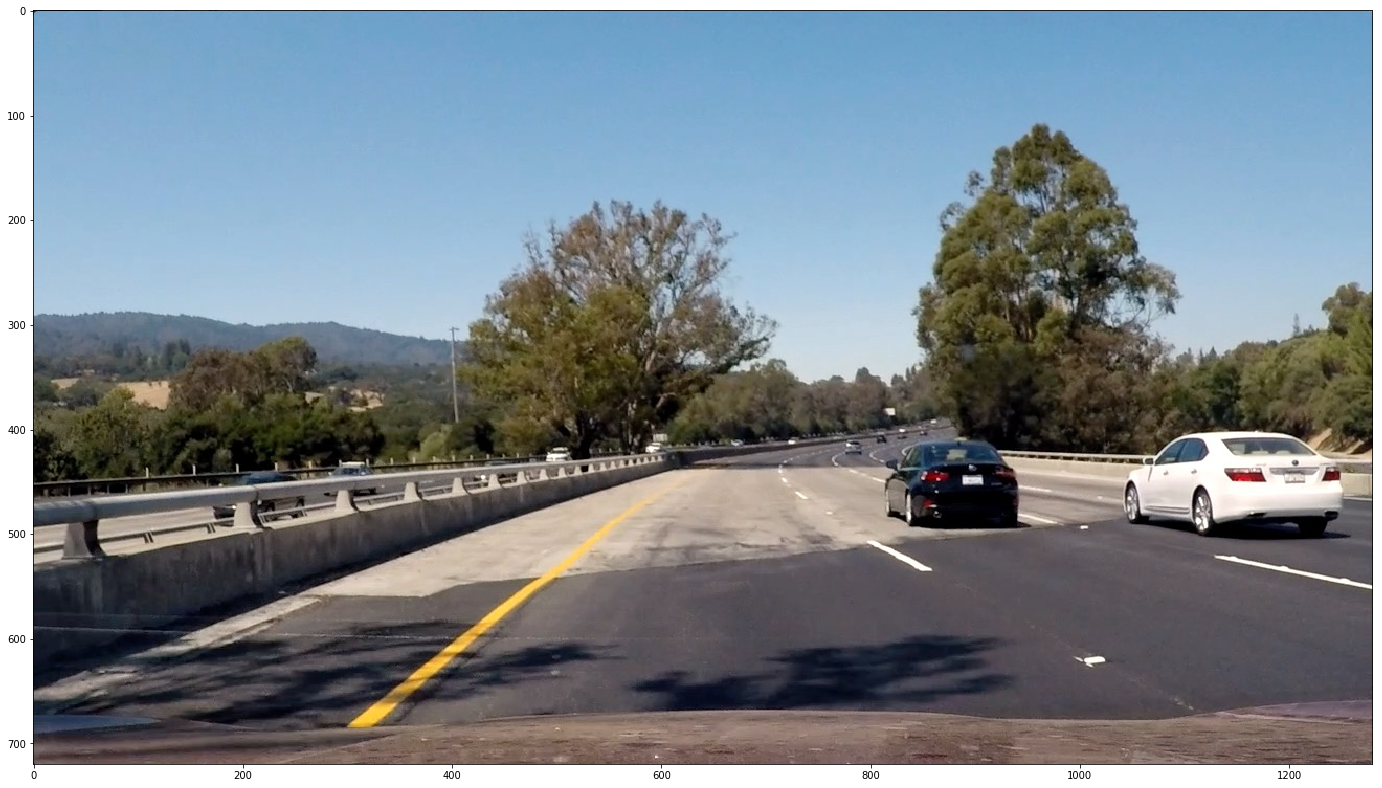

In [18]:

from collections import deque # for heatmap buffer
global multi_frame_heatmap # this is heatmaps of maxlen frames and will be how we keep track of heatmaps oevr maxlen frames

multi_frame_heatmap  = deque(maxlen = 50) # as in 25 frames per second

#this function will call the above pipline and keep track of the heatmap over so many frames
def heatmap_layer(img):
    
    
    heatmap = np.zeros_like(img[ :, :, 0])
    
    cumulative_heatmap = np.zeros_like(img[ :, :, 0])
    
    #output_image , heatmap = find_cars4(img)
    #heatmap = add_heat(one_frame_heatmap, one_frame_bbox_list)
    
    #scale = 0.5
    #y_start, y_stop = 400,464
    #output_image1 , one_frame_heatmap1 , one_frame_bbox_list1 = find_cars4(img,scale,y_start, y_stop)
    #heatmap = heatmap + add_heat(one_frame_heatmap1, one_frame_bbox_list1)
    
    #fig = plt.figure()
    #plt.subplot(131)
    #plt.imshow(heatmap, cmap='hot')
    #plt.title('Heat Map after 1')
    
    scale = 1.0
    y_start, y_stop = 400,592
    output_image2 , one_frame_heatmap2 , one_frame_bbox_list2 = find_cars4(img,scale,y_start, y_stop)
    heatmap = heatmap + add_heat(one_frame_heatmap2, one_frame_bbox_list2)
    
    #plt.subplot(132)
    #plt.imshow(heatmap , cmap='hot')
    #plt.title('Heat Map after2')
    
    scale = 1.5
    y_start, y_stop = 400,656
    output_image3 , one_frame_heatmap3 , one_frame_bbox_list3 = find_cars4(img,scale,y_start, y_stop)
    heatmap = heatmap +  add_heat(one_frame_heatmap3, one_frame_bbox_list3)
    
    #plt.subplot(133)
    #plt.imshow(heatmap, cmap='hot')
    #plt.title('Heat Map after 3') 
    
    multi_frame_heatmap.append(heatmap)
              
    for heatmap in multi_frame_heatmap:
        
        cumulative_heatmap = cumulative_heatmap + heatmap       
        #cumulative_heatmap = add_heat(heatmap)# + heatmap        
        
    #change name?heatmap = apply_threshold(heatmap, 5)# 2 seemed to work on first attempt upon restart no....
    cumulative_heatmap = apply_threshold(cumulative_heatmap, 80)#as in 2 by 8 frames#4 new single min....30 changed to 60 one for each frame persec
    cumulative_heatmap = np.clip(cumulative_heatmap,0,255)  
    #print('cumulative_heatmap len', len(cumulative_heatmap), 'cumulative_heatmap shape', cumulative_heatmap.shape)
    #plt.subplot(133)
    #plt.imshow(cumulative_heatmap, cmap='hot')
    #plt.title('Heat Map after 3')
    
    #s = generate_binary_structure(2,2)
    s = [[1,1,1],
         [1,1,1],
         [1,1,1]]
    
    labels = label(cumulative_heatmap,structure=s) #https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.ndimage.measurements.label.html
    
    output_image = draw_labeled_bboxes(np.copy(img), labels)

    #fig = plt.figure(figsize=(24,48))
    #plt.imshow(output_image1)
    #plt.imshow(output_image2)
    #plt.imshow(output_image3)
    
    
    return output_image

test_image = mpimg.imread('test4.jpg')#,1.0, y_start, y_stop)
output_test_image = heatmap_layer(test_image)
fig = plt.figure(figsize=(24,48))
plt.imshow(output_test_image)

In [19]:
########################
# pipeline 15 July

############################## 
# video handling section

# Import everything needed to edit/save/watch video clips 
# same as previuos projects

from moviepy.editor import VideoFileClip
from IPython.display import HTML




output_video = 'Test 85 Cumulative heatmap pix 12 and orient 12 1.0 1.5 thre 80 Q50 FULL.mp4'

#input_video = VideoFileClip("test_video.mp4")
#input_video = VideoFileClip("project_video.mp4").subclip(23,27)#newclip = clip.subclip(0,-2)
input_video = VideoFileClip("project_video.mp4")

#clip = input_video.fl_image(find_cars4)# findcars3 is main function
clip = input_video.fl_image(heatmap_layer)

clip.write_videofile(output_video, audio=False)
#
#note to self
#changed pix etc for overnight test
# the overlapping bounding boxes should be merging this may be to do with the 2 stages and how I handle them look at this tomorrow
#>>> labeled_array, num_features = label(a, structure=s)
#https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.ndimage.measurements.label.html

[MoviePy] >>>> Building video Test 85 Cumulative heatmap pix 12 and orient 12 1.0 1.5 thre 80 Q50 FULL.mp4
[MoviePy] Writing video Test 85 Cumulative heatmap pix 12 and orient 12 1.0 1.5 thre 80 Q50 FULL.mp4


100%|███████████████████████████████████████████████████████▉| 1260/1261 [2:44:19<00:07,  7.51s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: Test 85 Cumulative heatmap pix 12 and orient 12 1.0 1.5 thre 80 Q50 FULL.mp4 

